In [1]:
from process_data_2025 import main
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit   

In [5]:
def get_scatter_plot(df, file):
    # freqs = counts_df['Bin center'].cat.categories.astype(float)
    # # freqs = counts_df['Freq']
    # counts = counts_df['Count']

    df['Bin center'] = pd.to_numeric(df['Bin center'], errors='coerce')
    df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Bin center','Count'])
    df = df.sort_values('Bin center')

    # plt.xlim(423.349, 423.354)
    # plt.ylim(-10, 10000)

    x = df['Bin center'].to_numpy()
    y = df['Count'].to_numpy()
    max_counts = df['Count'].max()

    # plt binned counts 
    plt.plot(x,y/max_counts, label = file)
    plt.xlabel('Freq THz')
    plt.ylabel('Count')
    plt.title(f'{file}')
    # plt.legend()

    plt.show()


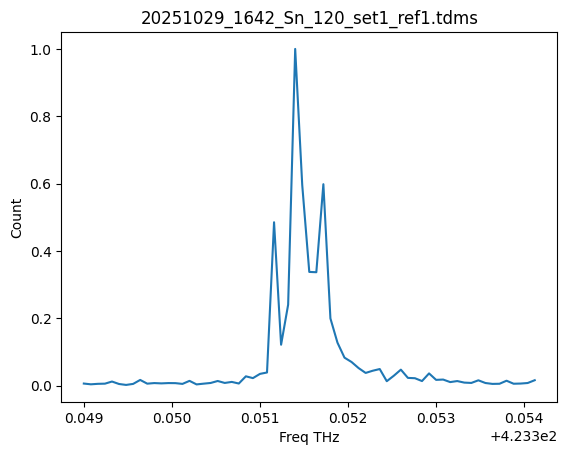

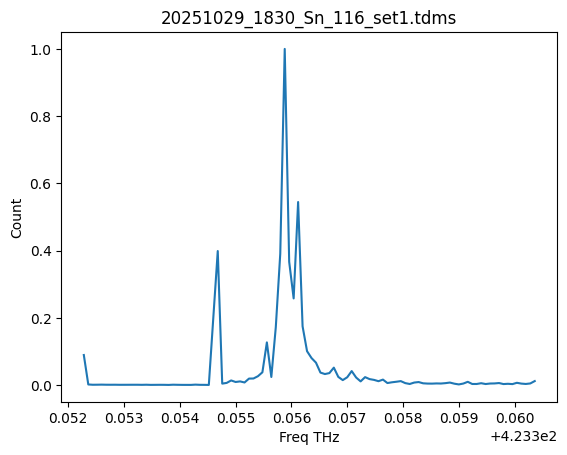

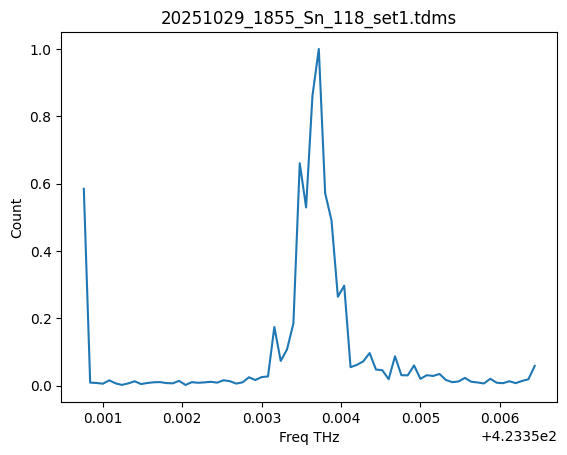

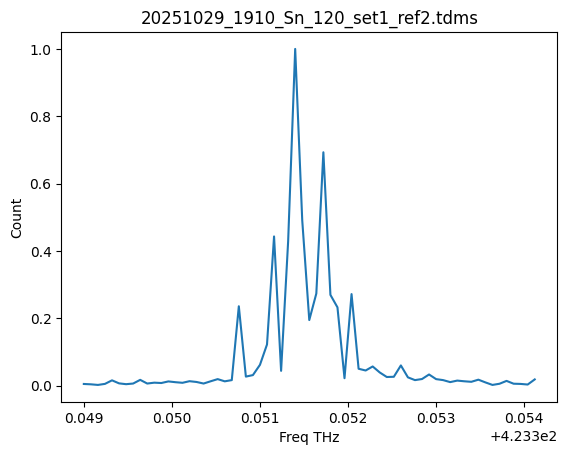

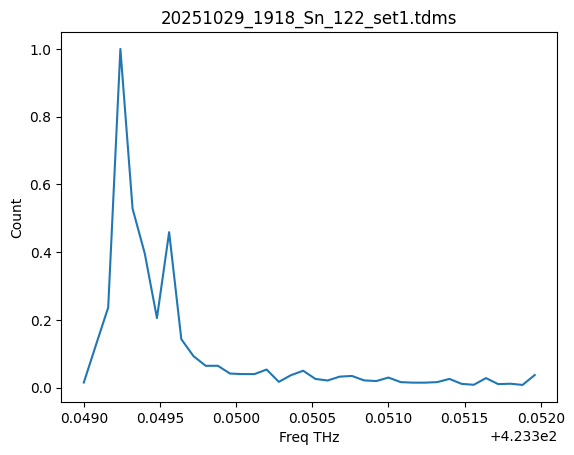

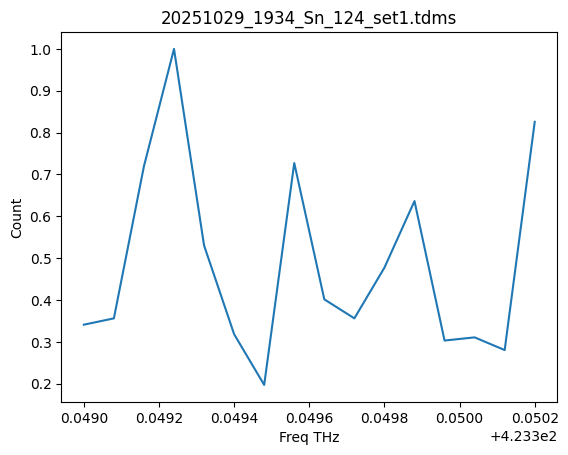

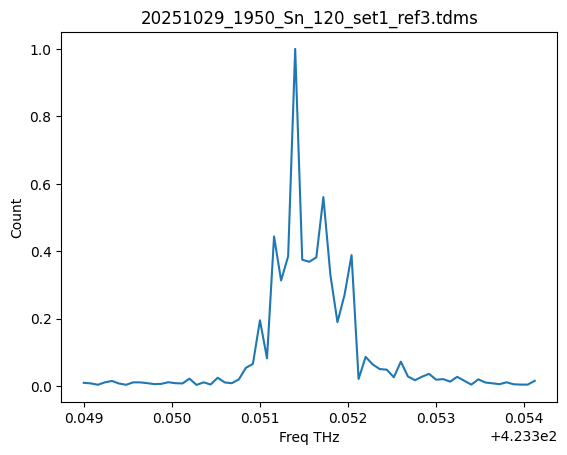

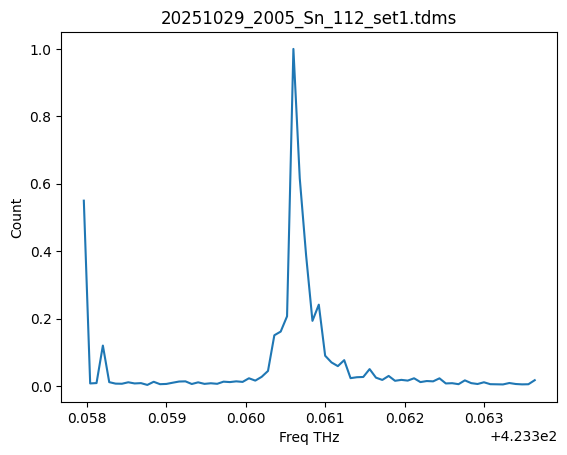

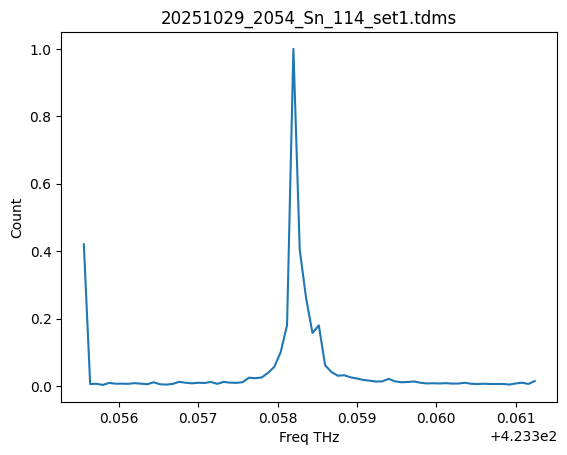

In [6]:
folder_path = Path('./data')
for binned_df, filename, isotope in main(folder_path):
    get_scatter_plot(binned_df, filename)
